------------------

# Basic ASE Tutorial

In [1]:
import numpy as np

With ASE we can design, manipulate, and analyze atomic systems.
* Building Atoms Objects
  * Bulk, Slab, Cluster, Nanotube, etc.
* Altering Atoms Objects
  * Translate, Rotate, Reflect, Scale, etc.
* Relaxation, Optimization, and Molecular Dynamics
  * BFGS, Langevin, and VelocityVerlet Algorithms
* Writing and Reading Files
  * Ase.db Files (highly compressed; quick to read/write)
  * VASP POSCARs, OUTCARs, DOSCARs, etc.
* Density of States, Vibrational Mode Analysis, etc.

------------------

## ASE Atoms Objects

In [2]:
from ase.atoms import Atoms
from ase.data import atomic_numbers, chemical_symbols

In [3]:
#convert between elemental symbols and numbers with ase.data dictionaries
print(atomic_numbers['Au'])
print(chemical_symbols[47])

79
Ag


In [4]:
#Example
stoichiometry = 'Au5Ag2' #different ways of doing the same thing
stoichiometry = ['Au']*5 + ['Ag']*2 #elemental symbols
stoichiometry = [79]*5 + [47]*2 #elemental numbers
cell = [10,10,10] #Angstroms
pbc = False #periodic boundary conditions


positions = np.random.random((len(stoichiometry),3)) #[n_atoms x n_dimensions]
print(positions)

[[0.59990167 0.8492407  0.64435101]
 [0.09575271 0.11484808 0.04363001]
 [0.28236472 0.02694499 0.16706889]
 [0.05912235 0.13190346 0.88402702]
 [0.6894111  0.68005825 0.63626914]
 [0.79106576 0.97910453 0.06481582]
 [0.33065927 0.92525249 0.22410735]]


In [5]:
test = Atoms(stoichiometry, positions=positions, cell=cell, pbc=pbc)
test

Atoms(symbols='Au5Ag2', pbc=False, cell=[10.0, 10.0, 10.0])

In [6]:
#Accessing properties
for t in test: print(t) #atom by atom

print(test.symbols) #via get methods
print(test.get_chemical_symbols())
print(test.get_positions())
print(test.get_cell())
print(test.get_pbc())
print(test.get_all_distances()) #very useful for inter-atomic distance constraints
#Setting properties
test.set_positions(np.random.random((len(stoichiometry),3))*cell[0])
test.set_pbc([True])
test

Atom('Au', [0.5999016681257476, 0.849240704191794, 0.6443510078497439], index=0)
Atom('Au', [0.09575271434295318, 0.11484807509183648, 0.04363001389980392], index=1)
Atom('Au', [0.28236471655097994, 0.0269449900532025, 0.16706888917088758], index=2)
Atom('Au', [0.05912235407097888, 0.1319034599641392, 0.8840270237939651], index=3)
Atom('Au', [0.6894110993435395, 0.6800582459408087, 0.6362691421976115], index=4)
Atom('Ag', [0.7910657596122156, 0.9791045310832076, 0.06481582147229659], index=5)
Atom('Ag', [0.3306592741902735, 0.9252524904187637, 0.22410735344685984], index=6)
Au5Ag2
['Au', 'Au', 'Au', 'Au', 'Au', 'Ag', 'Ag']
[[0.59990167 0.8492407  0.64435101]
 [0.09575271 0.11484808 0.04363001]
 [0.28236472 0.02694499 0.16706889]
 [0.05912235 0.13190346 0.88402702]
 [0.6894111  0.68005825 0.63626914]
 [0.79106576 0.97910453 0.06481582]
 [0.33065927 0.92525249 0.22410735]]
Cell([10.0, 10.0, 10.0])
[False False False]
[[0.         1.07441352 1.00239622 0.92976319 0.19157233 0.62391454
  0

Atoms(symbols='Au5Ag2', pbc=True, cell=[10.0, 10.0, 10.0])

In [7]:
#Viewing

from ase.visualize import view
#view(test) #should open ase gui (graphical user interface)
#view(test, viewer='ngl') # need to install
view(test, viewer='x3d') # default notebook viewer

### Read The Documentation! --> https://wiki.fysik.dtu.dk/ase/ase/build/build.html

There is *so* much more you can do. Please read the docs.

------------------

## Relaxing Atoms objects

To relax our system, we need a calculator.
We can use any of those available to us, including neural networks.
Here we use EMT calculator for demonstration. Moreover, we need a relaxation algorithm (optimizer), we often choose BFGS.

In [8]:
from ase.calculators.emt import EMT
from ase.optimize import BFGS, FIRE

In [9]:
test1 = test.copy() #copy so as to not change original atoms object
test1.center() #moves mean position to mean middle of cell
test1.calc = EMT() #give the atoms object a calculator

steps = 500 #relaxation steps (algorithmic loops)
fmax = 0.001 # relaxation stops if forces < fmax
traj = 'TRAJ/relax.traj' #path to save relaxation trajectory file

rx = BFGS(test1, trajectory=traj)
rx.run(steps=steps, fmax=fmax)

      Step     Time          Energy          fmax
BFGS:    0 12:55:19       17.893671        4.180218
BFGS:    1 12:55:19       17.261641        4.186267
BFGS:    2 12:55:19       15.344602        2.932059
BFGS:    3 12:55:19       16.206031       22.521227
BFGS:    4 12:55:19       13.493324        4.094515
BFGS:    5 12:55:19       10.714701        3.520562
BFGS:    6 12:55:19       10.945476        8.040445
BFGS:    7 12:55:19       10.110752        1.855473
BFGS:    8 12:55:19        9.997732        0.788993
BFGS:    9 12:55:19        9.965011        0.539390
BFGS:   10 12:55:19        9.955347        0.549037
BFGS:   11 12:55:19        9.822822        1.722940
BFGS:   12 12:55:19        9.658574        2.755436
BFGS:   13 12:55:19        9.355683        3.310661
BFGS:   14 12:55:19        8.871099        3.438732
BFGS:   15 12:55:19        8.322457        2.683967
BFGS:   16 12:55:19        8.300525        2.620478
BFGS:   17 12:55:19        8.144133        1.906929
BFGS:   18 12:

True

#### test1 is now the relaxed object. We can view it by reading the Trajectory file

In [10]:
from ase.io import Trajectory

T1 = Trajectory(traj) #the Trajectory object is just an array of frames
T1[0] #so the first element is the first frame, etc.
view(T1) #you can view the whole trajectory

#### Let's customize a plot with Matplotlib. 

Please read the docs --> https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

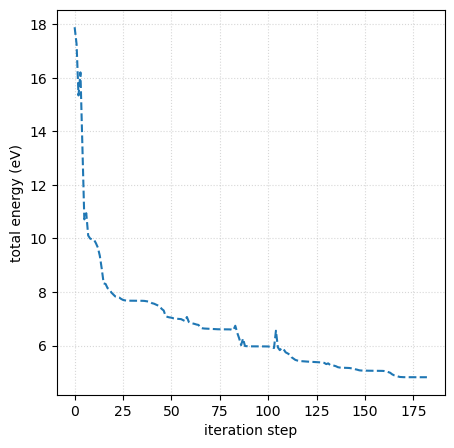

In [11]:
import matplotlib.pyplot as plt

#Now that we've associated a calculator (here EMT), we have energies and forces
energies = [t.get_total_energy() for t in T1]

plt.figure(figsize=(5,5))
x = np.arange(len(T1))
plt.plot(x, energies, ls='--')
plt.xlabel('iteration step')
plt.ylabel('total energy (eV)')
plt.grid(ls=':', alpha=0.5)
plt.show()

For the follwing MD simulation, we'll take from an appropriate part of the relaxation trajectory. That is, if we try to run MD on a system that is *too high in energy*, it will explode. Likewise, if we try to run MD on a system that is *too low in energy* it will not move. Hence we take from an appropriate part of the previous relaxation trajectory, by referring to the plot above. *Note that each time you run this notebook, the values will be different, due to np.random*

In [12]:
index = 25 #this is around where the energy curve is low but not flat
test2 = T1[index].copy() #it is smart to make copies so we don't modify the original objects

------------------
## Using Molecular Dynamics (MD)

To use MD, we again need a calculator, but this time we need an MD algorithm, like the optimizer for relaxation.

In [13]:
import ase.units as units #needed for femto-second default
from ase.md.verlet import VelocityVerlet #constant energy

In [14]:
traj = 'TRAJ/md1.traj' #path to save trajectory file
log = 'TRAJ/md1.log' #path to save logfile (contains useful information)

test2.center() #re-center the system
test2.calc = EMT() #make sure it has a calculator

steps = 500
md = VelocityVerlet(test2, timestep=1.0*units.fs, trajectory=traj, logfile=log)
md.run(steps)

True

Note that a smaller time-step will make your MD simulation run smoother, but will be more costly.

In [15]:
T2 = Trajectory(traj)
view(T2)

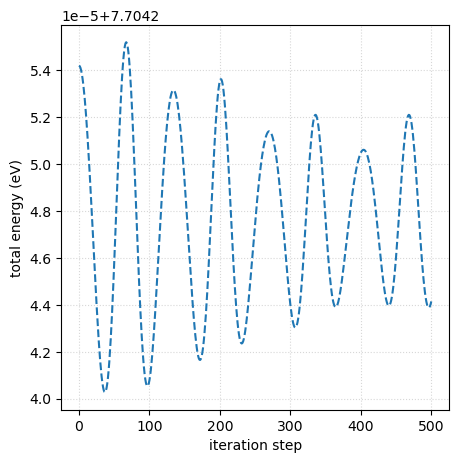

In [16]:
energies = [t.get_total_energy() for t in T2]

plt.figure(figsize=(5,5))
x = np.arange(len(T2))
plt.plot(x, energies, ls='--')
plt.xlabel('iteration step')
plt.ylabel('total energy (eV)')
plt.grid(ls=':', alpha=0.5)
plt.show()

#### In this way, we can easily generate random yet realistic structures.

First we used constant energy dynamics, now let's use constant temperature dynamics.

In [17]:
from ase.md.langevin import Langevin #constant temperature

In [18]:
traj = 'TRAJ/md2.traj'
log = 'TRAJ/md2.log'

steps = 500
temp = 2000 #system dependent (K)
fric = 0.002 #dampening (energy lost)

test3 = test2.copy()
test3.center()
test3.calc = EMT()

md = Langevin(test3, timestep=10*units.fs, 
              temperature_K=temp, friction=fric, 
              trajectory=traj, logfile=log)

md.run(steps=steps)

Traceback (most recent call last):
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/site-packages/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/site-packages/ase/gui/pipe.py", line 28, in main
    plt.show()
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/site-packages/matplotlib/pyplot.py", line 446, in show
    return _get_backend_mod().show(*args, **kwargs)
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/site-packages/IPython/core/display_functions.py", line 265, in display
    print(*objs)
ValueError: I/O operati

True

In [19]:
T3 = Trajectory(traj)
view(T3)

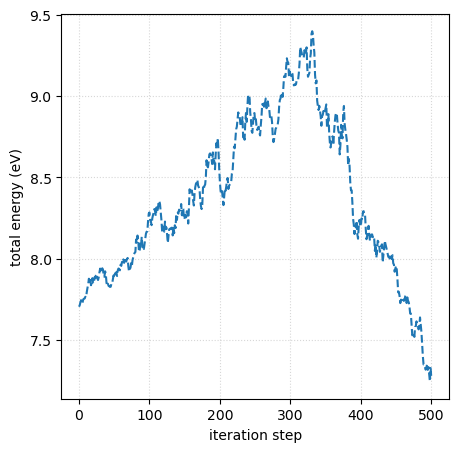

In [20]:
energies = [t.get_total_energy() for t in T3]

plt.figure(figsize=(5,5))
x = np.arange(len(T3))
plt.plot(x, energies, ls='--')
plt.xlabel('iteration step')
plt.ylabel('total energy (eV)')
plt.grid(ls=':', alpha=0.5)
plt.show()

------------------

## Reading and Writing Databases and Files

We shall look at reading and writing
* ase.db databases
* POSCARs
* OUTCARs

In [21]:
from ase.io import read, write
from ase.db import connect

In [22]:
#Here we save the trajectory file from before as a database (db)
write('DBs/traj3.db', T3)

Traceback (most recent call last):
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/site-packages/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/site-packages/ase/gui/pipe.py", line 28, in main
    plt.show()
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/site-packages/matplotlib/pyplot.py", line 446, in show
    return _get_backend_mod().show(*args, **kwargs)
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/Users/any/miniconda3/envs/shnet/lib/python3.8/site-packages/IPython/core/display_functions.py", line 265, in display
    print(*objs)
ValueError: I/O operati

In [23]:
#now we can load it as a database
db = connect('DBs/traj3.db')
db

In [24]:
#The database object contains all images, and can be accessed by index
#This returns atoms objects directly, which is very useful

test = db.get_atoms(id=1) #note that the first image is index=1, not index=0
test

Atoms(symbols='Au5Ag2', pbc=True, cell=[10.0, 10.0, 10.0], momenta=..., calculator=SinglePointCalculator(...))

In [25]:
print('stoichiometry:', test.get_chemical_symbols())
print('positions:', test.get_positions())
print('forces:', test.get_forces())
print('Potential energy:', test.get_potential_energy())
print('Kinetic energy:', test.get_kinetic_energy())
print('Total energy:', test.get_total_energy())
print('cell:', test.get_cell())
print('pbc:', test.get_pbc())
print('calculator:', test.get_calculator())
print('momentum:', test.get_momenta()) #Since we preformed MD sim

stoichiometry: ['Au', 'Au', 'Au', 'Au', 'Au', 'Ag', 'Ag']
positions: [[3.84268197 0.01772476 8.42814813]
 [5.69239788 3.80287436 7.12420477]
 [1.72128911 9.21951314 9.25412958]
 [0.6864928  9.98227524 2.62124592]
 [9.3135072  1.81915873 2.43068906]
 [5.52547252 1.43366292 6.91935144]
 [3.6940044  8.76249392 0.74587042]]
forces: [[ 0.23137354  0.0818329  -0.06551051]
 [-0.00654482  0.01522544  0.00916594]
 [-0.54698941 -0.00559017  0.04412471]
 [ 0.2170635  -0.19356963 -0.16290435]
 [-0.09614295  0.12964236 -0.01897978]
 [ 0.0280124  -0.00803327 -0.02910077]
 [ 0.17322773 -0.01950763  0.22320476]]
Potential energy: 7.605397903667458
Kinetic energy: 0.09884623426705169
Total energy: 7.70424413793451
cell: Cell([10.0, 10.0, 10.0])
pbc: [ True  True  True]
calculator: SinglePointCalculator(energy=7.605397903667458, forces=..., free_energy=7.605397903667458, stress=...)
momentum: [[-0.85112757 -0.07474754  0.90182249]
 [-0.26163613  0.8632541   0.40938778]
 [-0.34124866  1.53536877  1.61260

/var/folders/6p/l524lyf931xb5tfxr5j_g2sw0000gn/T/ipykernel_40462/75724889.py:9: DeprecationWarning: Please use atoms.calc
  print('calculator:', test.get_calculator())


### Writing and reading POSCARs

In [26]:
write('POSCAR', test)

In [27]:
file = 'POSCAR'

with open(file) as f: s = f.read()
print(s)

Au Ag
 1.0000000000000000
    10.0000000000000000    0.0000000000000000    0.0000000000000000
     0.0000000000000000   10.0000000000000000    0.0000000000000000
     0.0000000000000000    0.0000000000000000   10.0000000000000000
 Au  Ag 
   5   2
Cartesian
  3.8426819671681427  0.0177247624154458  8.4281481324627734
  5.6923978822239922  3.8028743628471728  7.1242047719767205
  1.7212891114289575  9.2195131419632261  9.2541295753700723
  0.6864928027136170  9.9822752375845543  2.6212459247307223
  9.3135071972863823  1.8191587270718479  2.4306890560670036
  5.5254725195285932  1.4336629219418884  6.9193514414007975
  3.6940043958552673  8.7624939230323555  0.7458704246299271



In [28]:
read(file)

Atoms(symbols='Au5Ag2', pbc=True, cell=[10.0, 10.0, 10.0])

## Reading OUTCARs

Here we assume you have a VASP OUTCAR file saved

In [29]:
test = read('DBs/test.OUTCAR')
test #notice that it comes with its own 'single-point calculator'

Atoms(symbols='Ag9Cu', pbc=True, cell=[20.0, 20.0, 20.0], calculator=SinglePointDFTCalculator(...))

In [30]:
from ase.io.vasp import read_vasp_out #more sophistocated method

In [31]:
read_vasp_out('DBs/test.OUTCAR')

Atoms(symbols='Ag9Cu', pbc=True, cell=[20.0, 20.0, 20.0], calculator=SinglePointDFTCalculator(...))

In [32]:
#DFT gives us a stress
test.get_stress()

array([ 4.01222931e-04,  5.69100802e-04,  5.51605852e-04,  3.55766020e-06,
       -5.02878390e-05,  1.68707992e-05])

------------------

## Density of States (DOS)

Here I have implemented a DOS plotting function, and gap calculator.

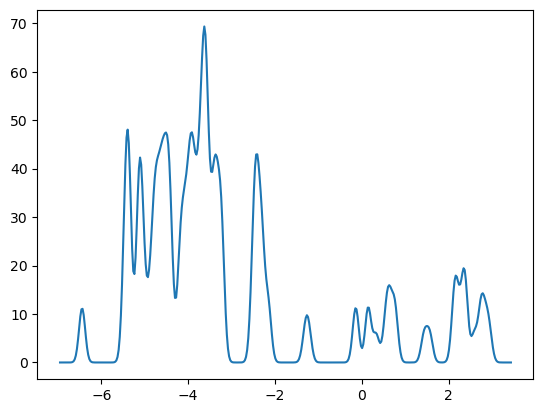

In [33]:
from ase.dft.dos import DOS

#simple method
dos = DOS(test.calc, width=0.1) #width is resolution for gaussian fit
d = dos.get_dos()
e = dos.get_energies()

plt.plot(e,d)

### Run cell below for more sophistocated approach

In [34]:
def mydos(image):
    
    dos = DOS(test.calc, width=0.1)
    d = dos.get_dos()
    e = dos.get_energies()
    
    up = dos.get_dos(spin=0)
    down = dos.get_dos(spin=1)

    plt.figure(figsize=(5,5))
    #plt.plot(e, d)
    plt.plot(e, up, c='b', label='spin-up')
    plt.plot(e, down, c='r', label='spin-down')

    homo, lumo, gap = mygap(e,d)
    #plt.vlines(min(d),max(d)/2, homo, color='b')
    #plt.vlines(min(d),max(d)/2, lumo, color='r')
    plt.vlines(min(d)/2, max(d)/2, 0.0, ls='--', color='k')
    plt.grid(ls=':', alpha=0.5)
    plt.xlabel('energy (eV)')
    plt.ylabel('DOS')
    plt.legend()
    plt.show()
    

def mygap(e, d, fermi_level=0):

    occupied = e[e <= fermi_level]
    unoccupied = e[e > fermi_level]
    dos_occupied = d[e <= fermi_level]
    dos_unoccupied = d[e > fermi_level]
    
    try:
        homo_index = np.max(np.where(dos_occupied > 0))
        homo_energy = occupied[homo_index]
    except ValueError:
        homo_energy = None
        print('no homo found')
    try:
        lumo_index = np.min(np.where(dos_unoccupied > 0))
        lumo_energy = unoccupied[lumo_index]
    except ValueError:
        lumo_energy = None
        print('no lumo found')
    if homo_energy is not None and lumo_energy is not None:
        gap = lumo_energy - homo_energy
        print('HOMO:', np.round(homo_energy,6), 'eV')
        print('LUMO:', np.round(lumo_energy,6), 'eV')
        print('GAP:', np.round(gap,6), ' eV')
        return homo_energy, lumo_energy, gap
    else:
        print('no gap found')
        return None

HOMO: -0.022282 eV
LUMO: 0.003673 eV
GAP: 0.025955  eV


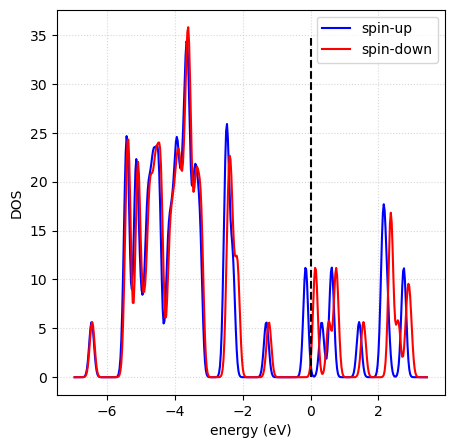

In [35]:
mydos(test)

You can tell the system is spin polarized due to the copper atom
### //END